In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn import manifold,datasets,decomposition,cluster
import matplotlib.pyplot as plt

In [2]:
lymphoid_lsi = pd.read_csv("lymphoid_lsi.csv", sep=",",index_col=0)
# the first LSI dimension is highly correlated with sequencing depth in that case, as sometimes happens with scATAC-seq data. 
# For this reason we discard the first component for downstream analysis.
lymphoid_lsi2 = lymphoid_lsi.iloc[:,1:50]

In [3]:
lymphoid_celltype = pd.read_csv("lymphoid_celltype.csv", sep=",",index_col=0)
lymphoid_celltype_values = lymphoid_celltype['x'].values
lymphoid_monocle = pd.read_csv("lymphoid.monocle_pseudotime.csv", sep=",",index_col=0)
lymphoid_monocle_time = lymphoid_monocle['x'].values

zip_types = dict(zip(set(lymphoid_celltype_values),np.arange(1,8,1)))
cell_clusters  =  [zip_types[i] for i in lymphoid_celltype_values]

In [4]:
from dtne import *
import time

The code runs 4s.


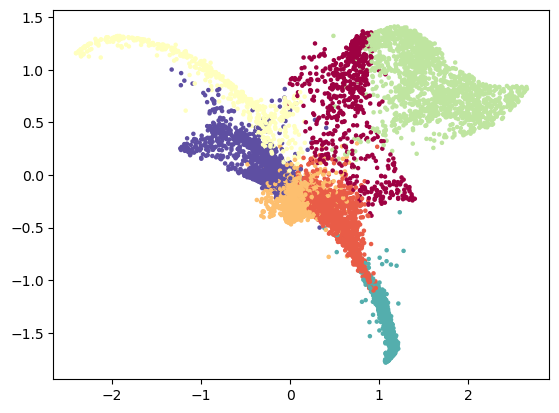

In [5]:
start_time = time.time()
embedding = DTNE(k_neighbors =30) 
Y = embedding.fit_transform(lymphoid_lsi2)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_clusters,s=5,cmap='Spectral')

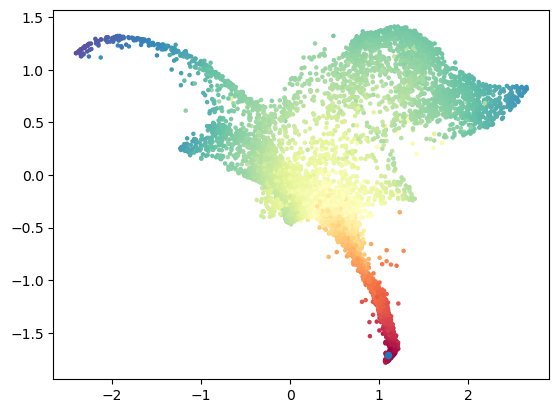

In [6]:
diff_time = embedding.order_cells(root_cells=[3047])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=5,cmap='Spectral')
plt.scatter(Y[3047,0], Y[3047,1],s=20)

In [7]:
pd.DataFrame(diff_time).to_csv('lymphoid.dtne_pseudotime.csv')

In [8]:
pd.DataFrame(Y).to_csv('lymphoid.dtne_y.csv')

The code runs 4s.


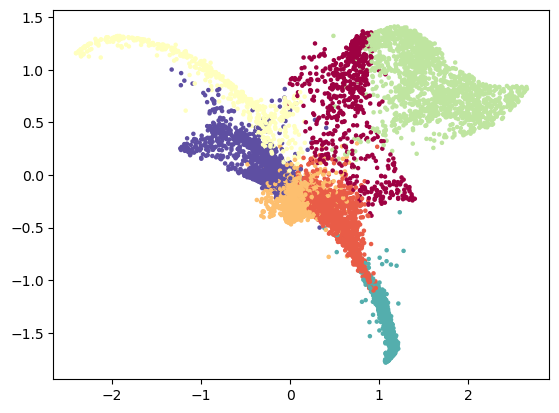

In [9]:
start_time = time.time()
embedding = DTNE(k_neighbors =30) 
Y = embedding.fit_transform(lymphoid_lsi2)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_clusters,s=5,cmap='Spectral')